In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings
%matplotlib inline
plt.rcParams['figure.figsize']=(15,13)
plt.rcParams['figure.dpi']=600

In [5]:
df=pd.read_csv('heart_disease.csv')

In [6]:
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope          thal  num  
0       150  FALSE      2.3  downsloping  fixed defect    0  
1       132  FALSE      0.0         flat  fixed defect    0  
2       148  FALSE      0.4         flat  fixed defect    0  
3       190  FALSE      0.0         flat  fixed defect    0  
4       126   TRUE      1.5         flat  fixed defect    0  
..      ...    ...      ...          ...           ...  ...  
903     120  FALSE      1.5    upsloping  fixed defect    4  
904     120   TRUE      3.0         flat  fixed defect    4  
905     123   TRUE      2.5  downsloping        normal    4  
906     105   TURE      NaN  downsloping        normal    4  
907     182  FALSE      NaN         flat  fixed defect    4  

[908 rows x 13 columns]

In [7]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [8]:
df.describe(include=object)

sex            cp restecg  exang slope               thal
count    908           908     908    908   908                908
unique     2             4       3      3     3                  3
top     Male  asymptomatic  normal  FALSE  flat  reversable defect
freq     718           495     542    535   453                368

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [13]:
df.shape

(846, 13)

In [14]:
df=pd.get_dummies(df).astype(int)

In [15]:
df

age  trestbps  chol  fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0     63       145   233    1     150        2    0           0         1   
1     41       135   203    0     132        0    0           0         1   
2     57       140   192    0     148        0    0           0         1   
3     52       118   186    0     190        0    0           0         1   
4     57       110   201    0     126        1    0           0         1   
..   ...       ...   ...  ...     ...      ...  ...         ...       ...   
901   51       110     0    1      92        0    4           0         1   
902   62       160   254    1     108        3    4           0         1   
903   53       125     0    0     120        1    4           0         1   
904   62       166   170    0     120        3    4           0         1   
905   56       170     0    0     123        2    4           0         1   

     cp_asymptomatic  ...  restecg_normal  restecg_st-t abnormality  \
0                  0  ...               0                         0   
1                  0  ...               1                         0   
2                  1  ...               1                         0   
3                  0  ...               0                         0   
4                  1  ...               1                         0   
..               ...  ...             ...                       ...   
901                1  ...               1                         0   
902                1  ...               0                         1   
903                1  ...               1                         0   
904                1  ...               0                         1   
905                0  ...               0                         0   

     exang_FALSE  exang_TRUE  slope_downsloping  slope_flat  slope_upsloping  \
0              1           0                  1           0                0   
1              1           0                  0           1                0   
2              1           0                  0           1                0   
3              1           0                  0           1                0   
4              0           1                  0           1                0   
..           ...         ...                ...         ...              ...   
901            1           0                  0           1                0   
902            0           1                  0           1                0   
903            1           0                  0           0                1   
904            0           1                  0           1                0   
905            0           1                  1           0                0   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                    1            0                       0  
1                    1            0                       0  
2                    1            0                       0  
3                    1            0                       0  
4                    1            0                       0  
..                 ...          ...                     ...  
901                  0            0                       1  
902                  0            0                       1  
903                  1            0                       0  
904                  1            0                       0  
905                  0            1                       0  

[846 rows x 24 columns]

In [16]:
df.duplicated(keep=False).sum()

0

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated(keep=False).sum()

0

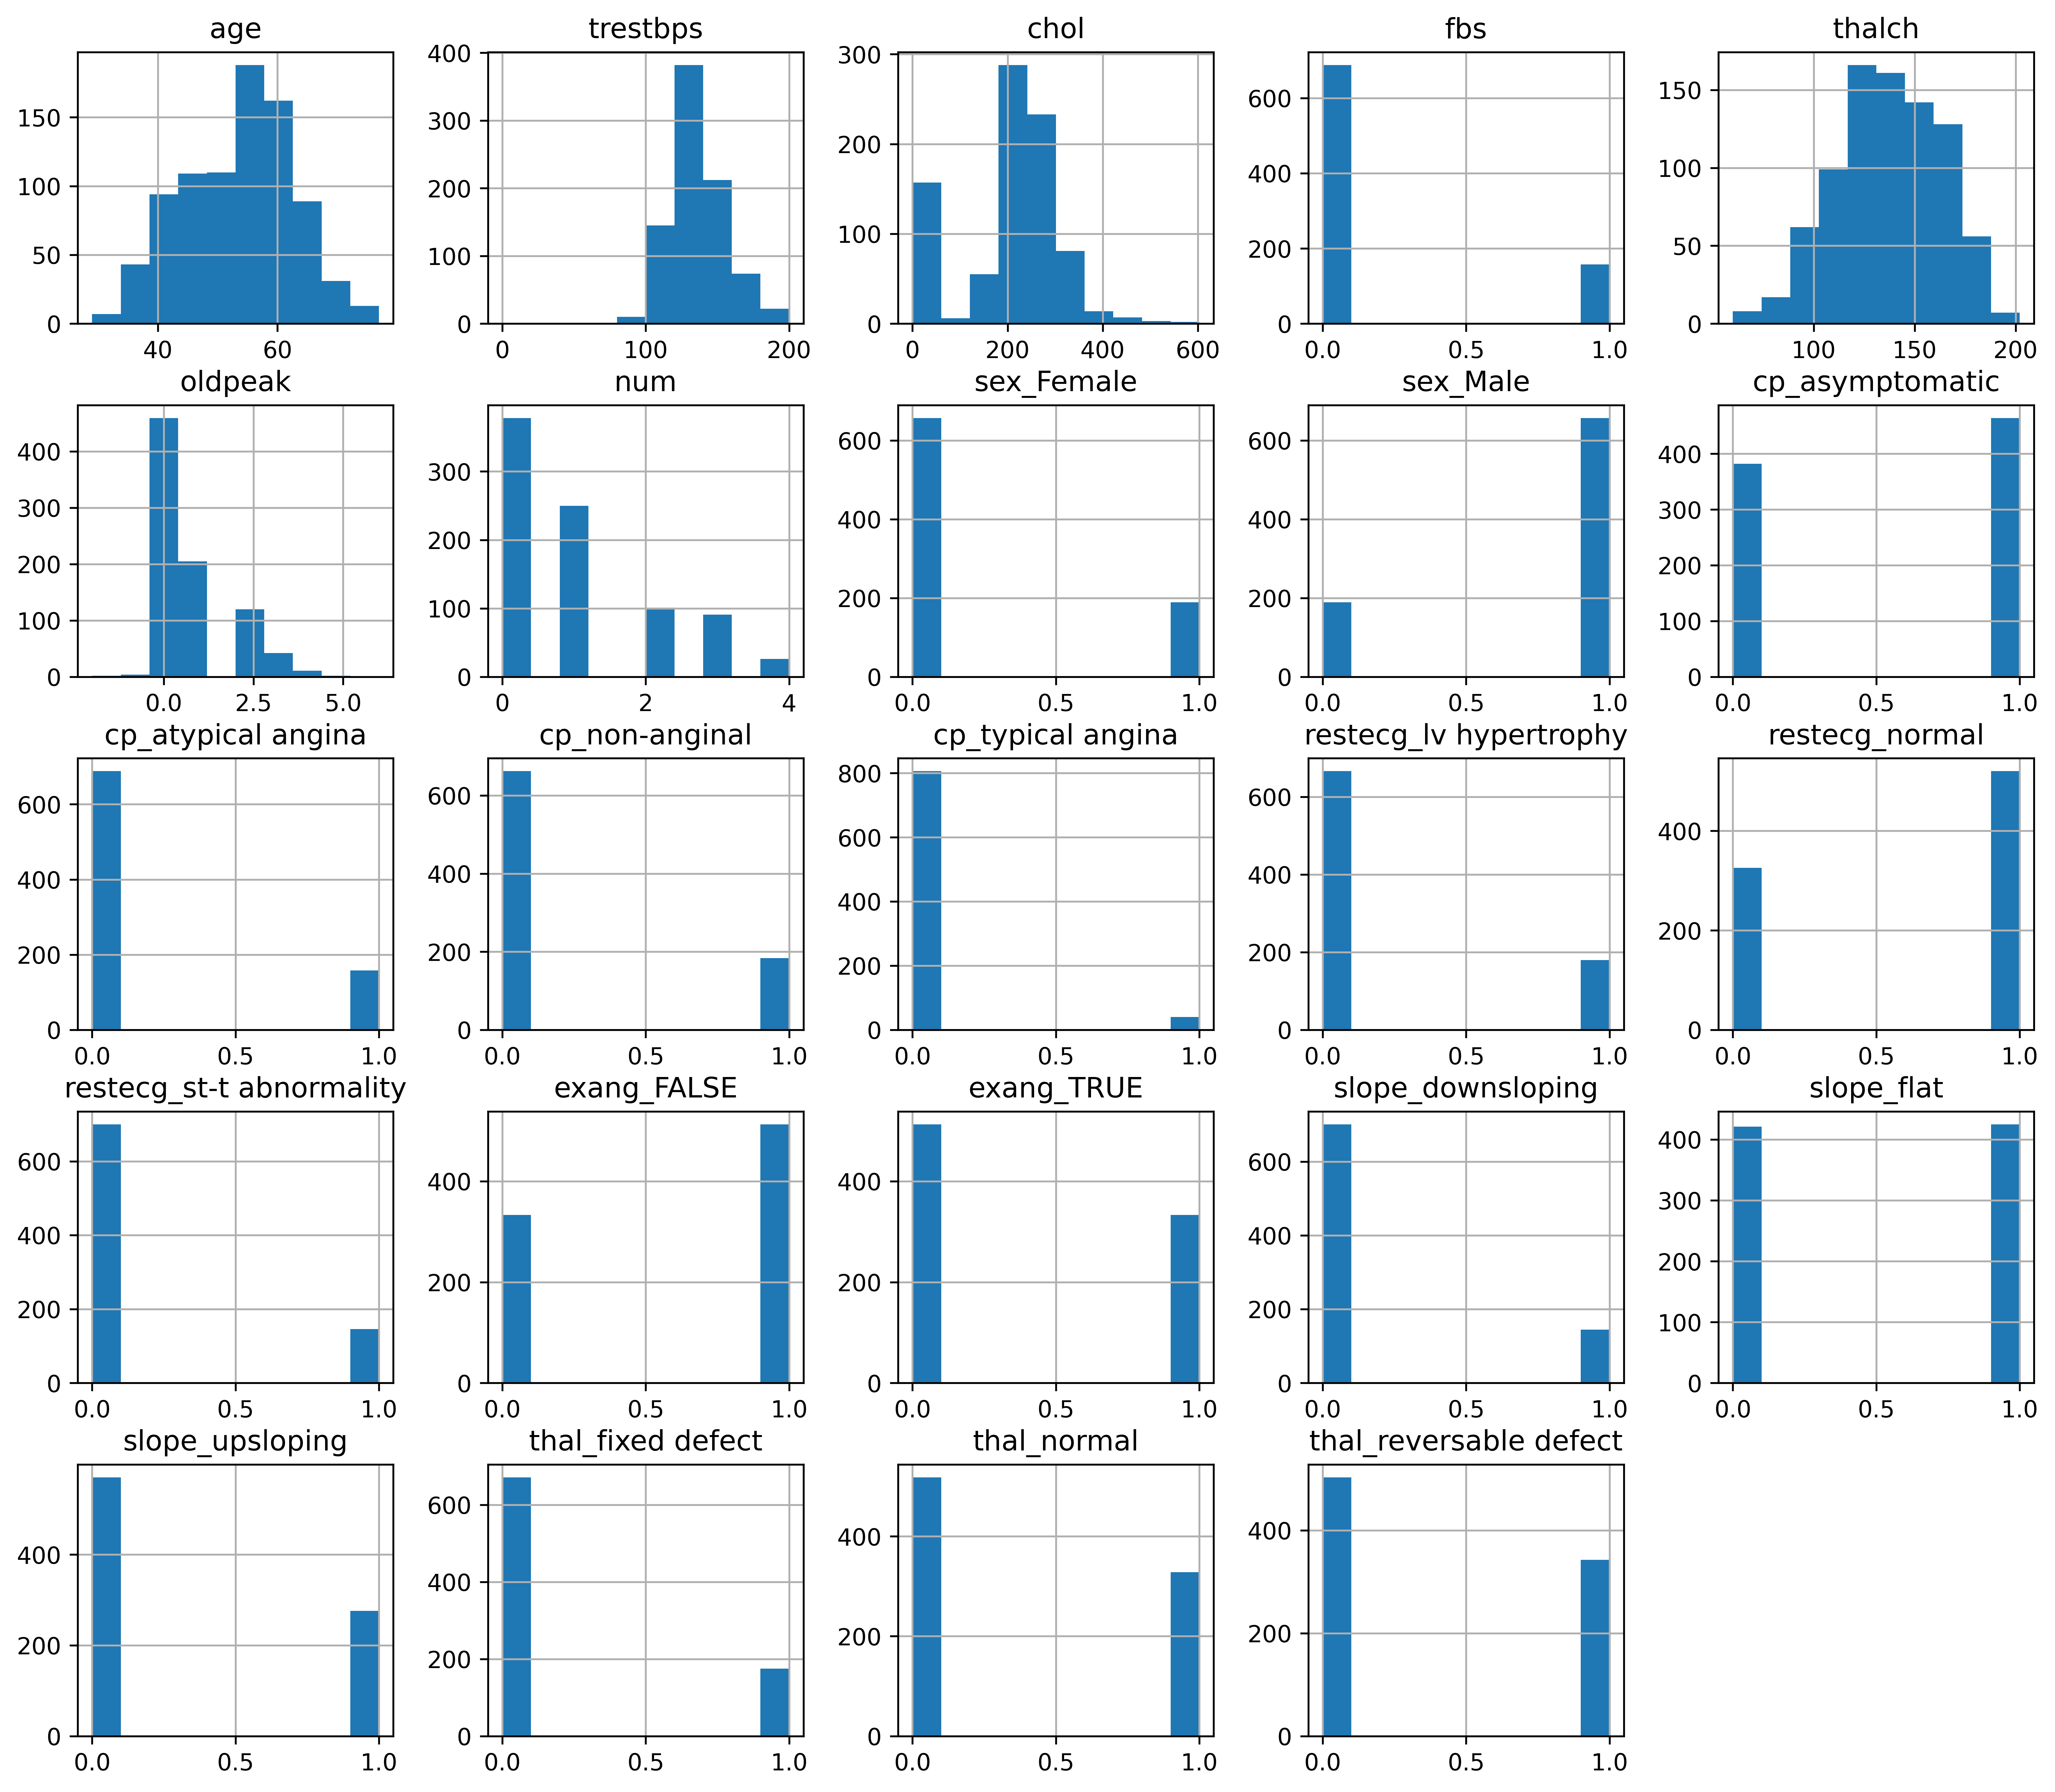

<Figure size 9000x7800 with 0 Axes>

In [19]:
df.hist()
plt.show()
plt.tight_layout()

<Axes: >

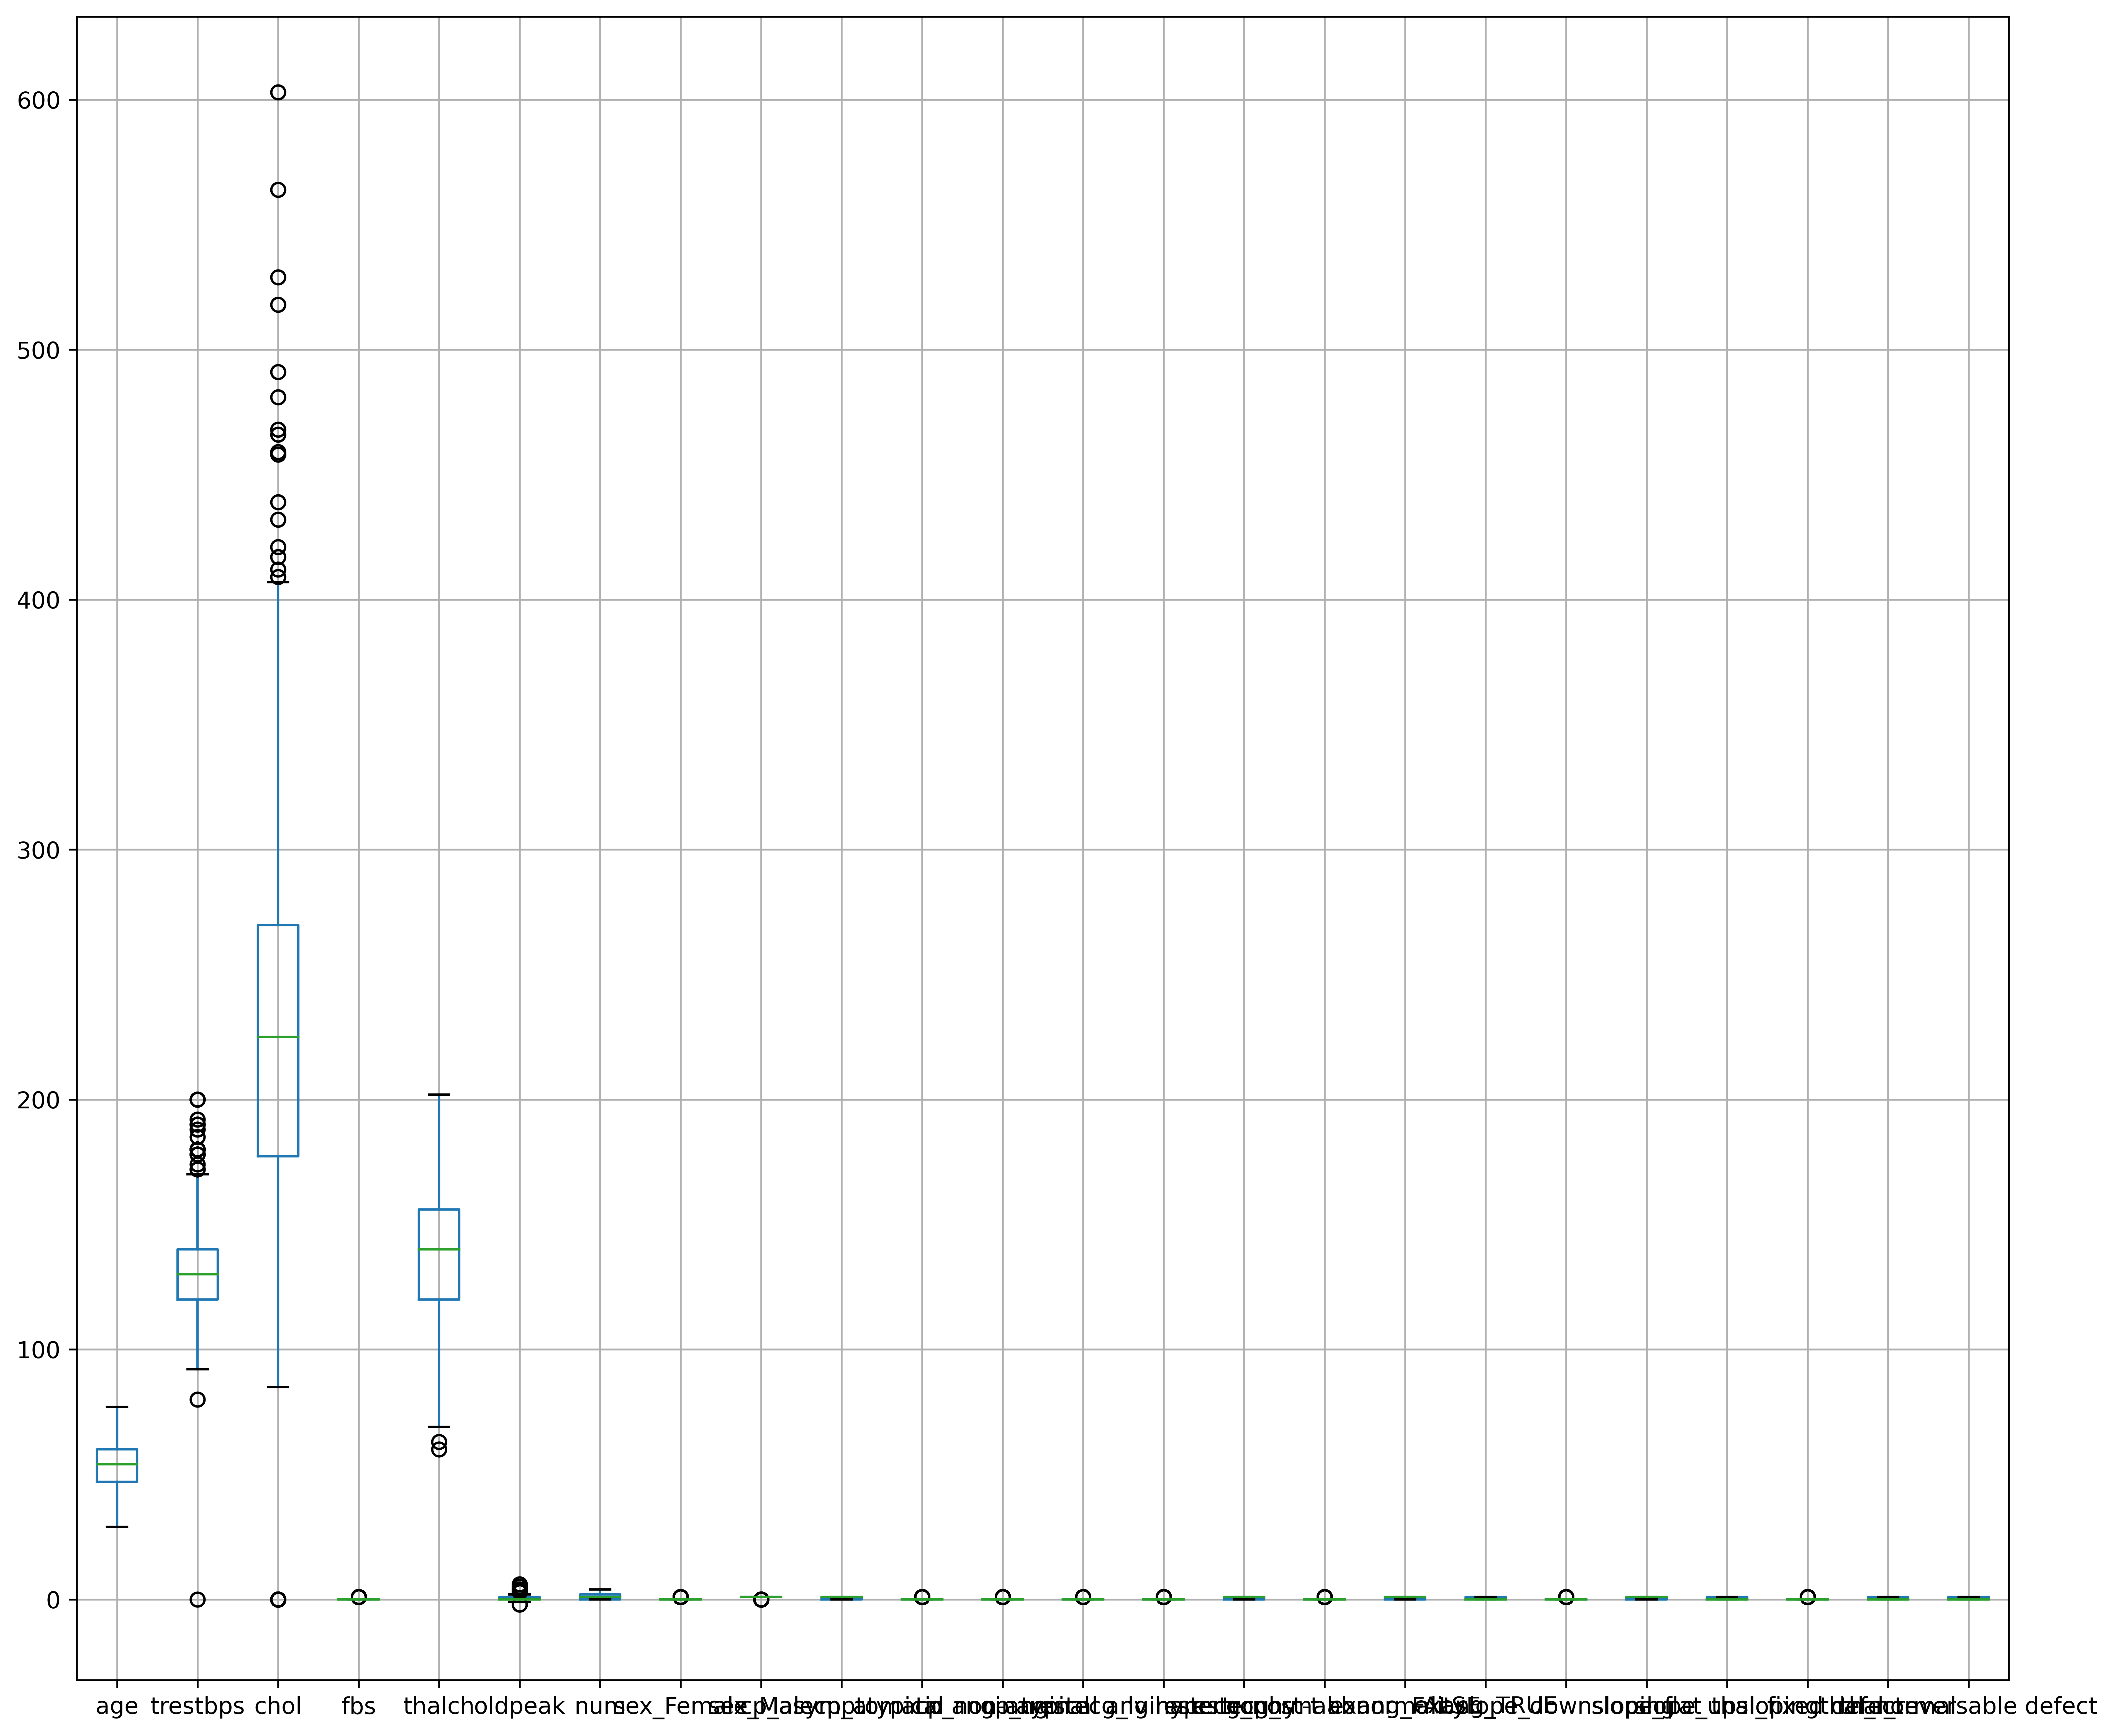

In [20]:
df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x249001ddb10>,
 'caps': [<matplotlib.lines.Line2D at 0x249001def50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2490019add0>],
 'medians': [<matplotlib.lines.Line2D at 0x249001dfd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24900199c10>],
 'means': []}

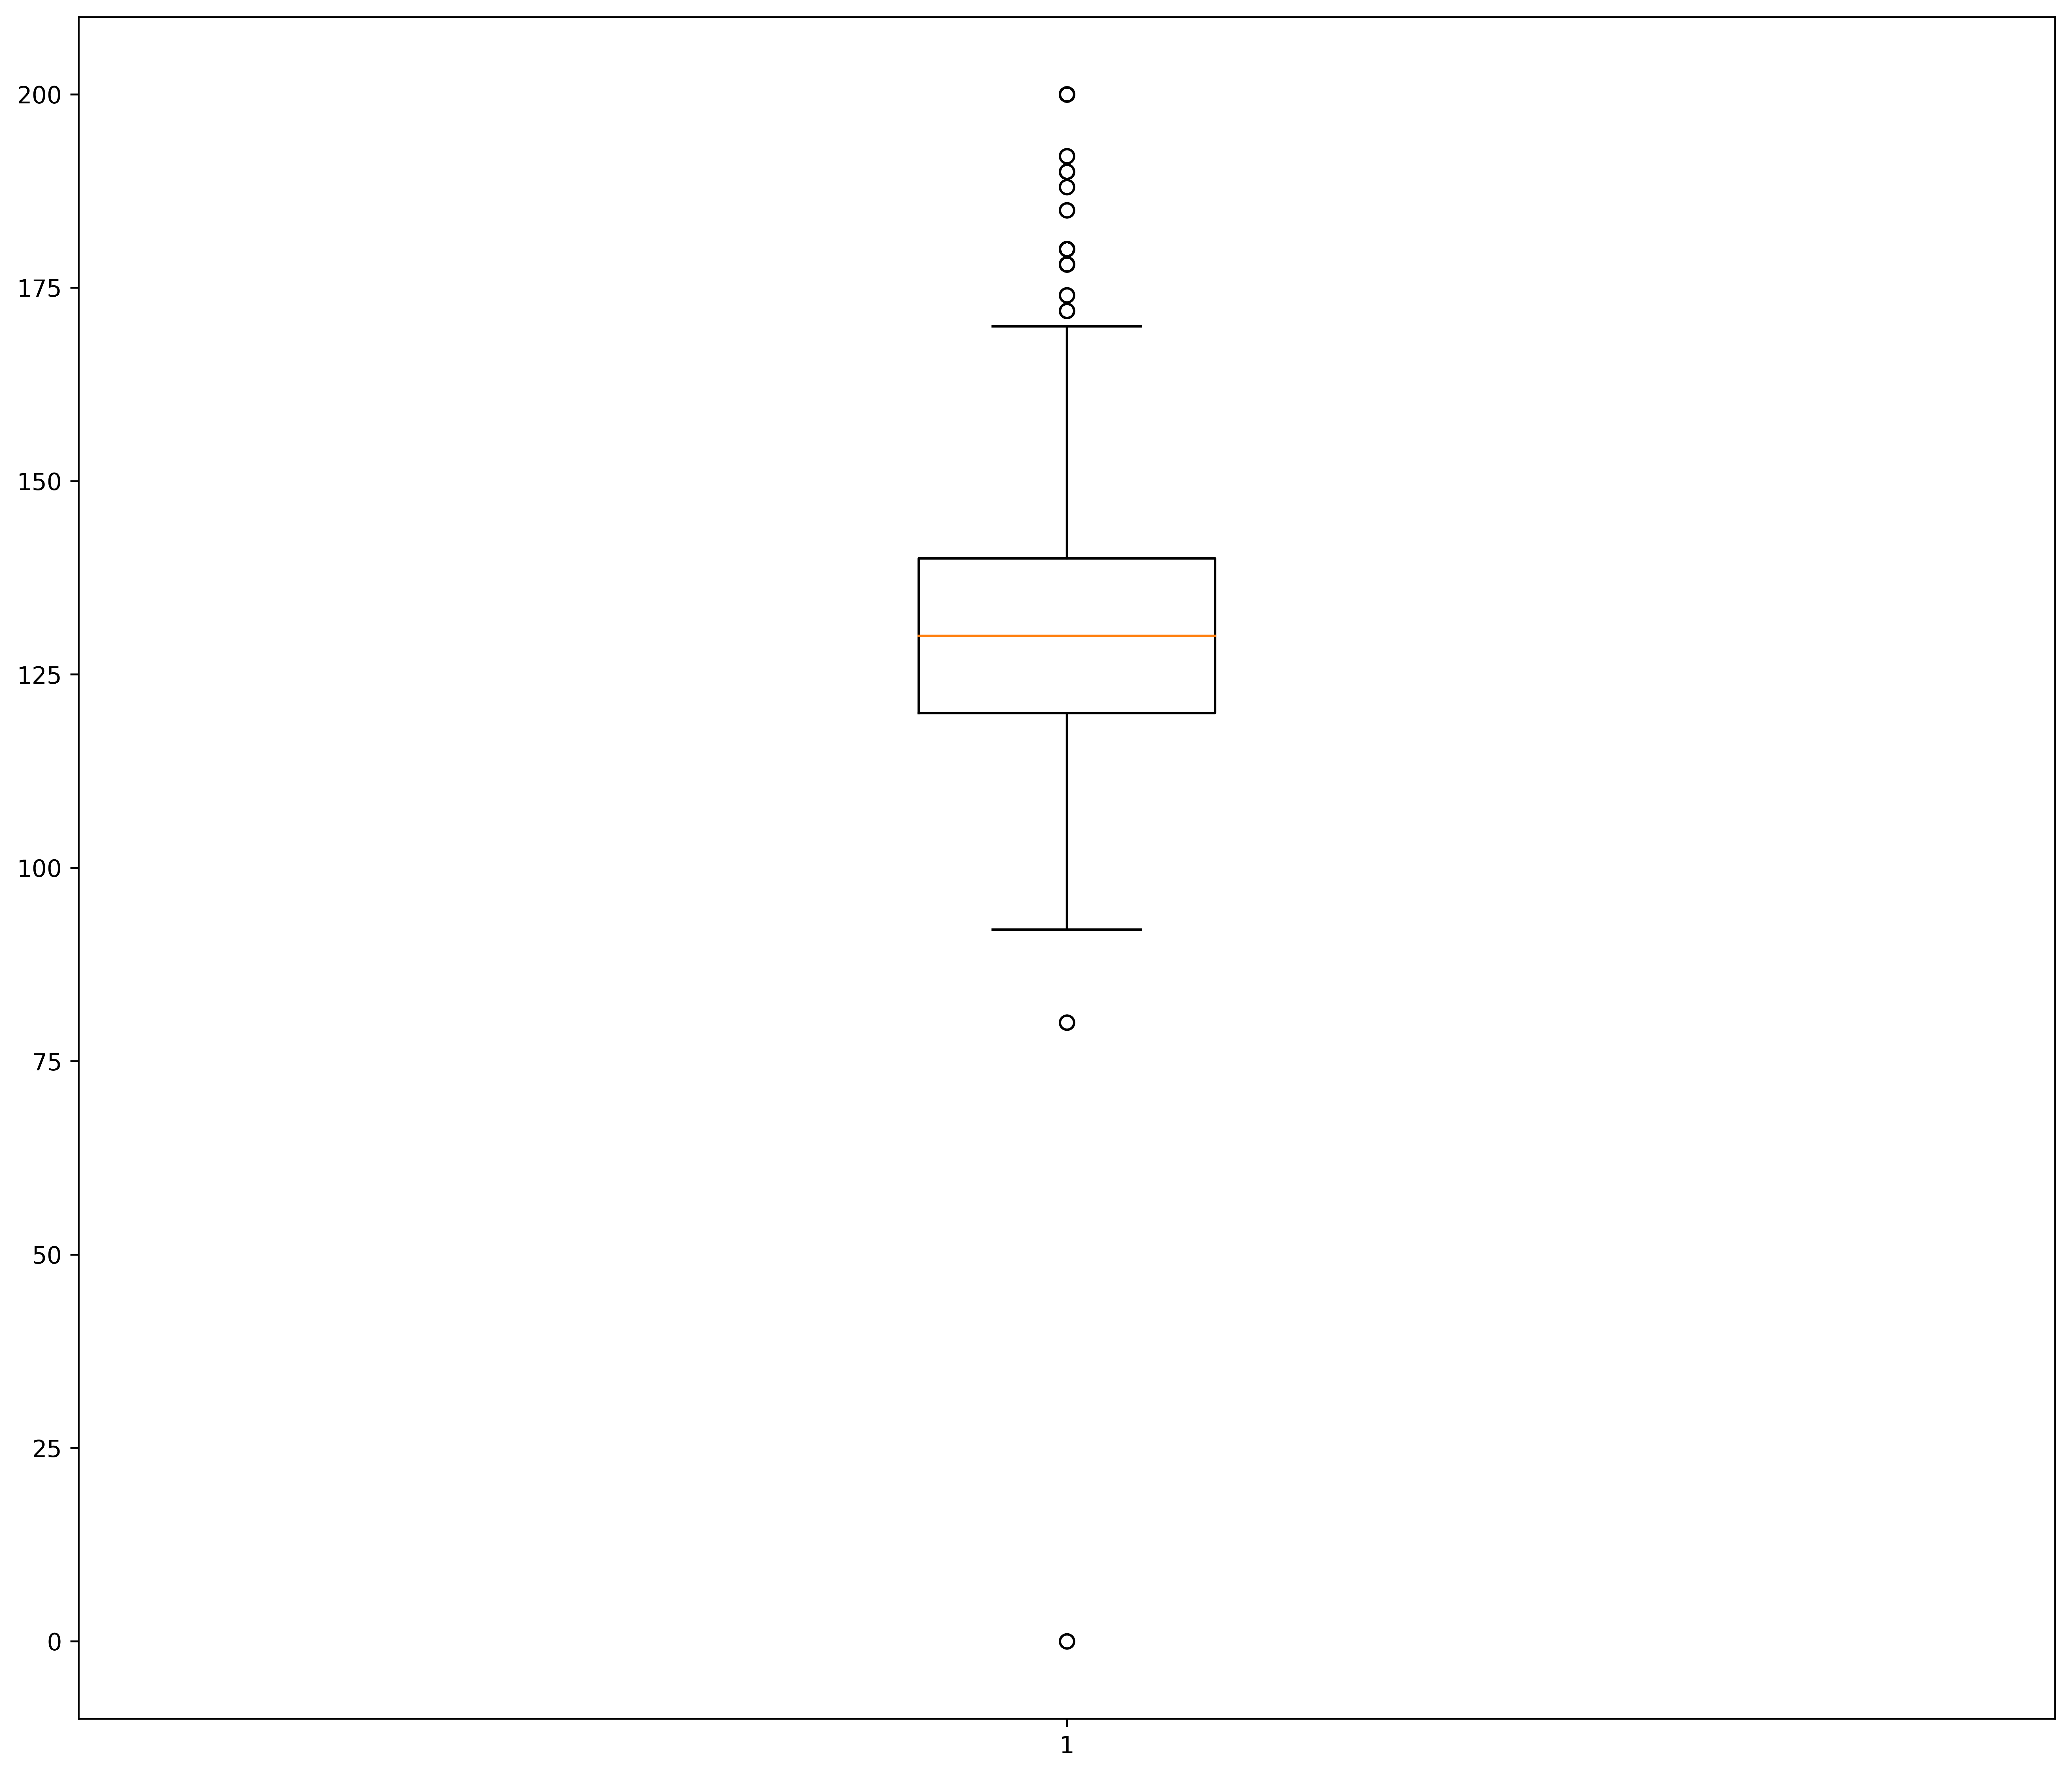

In [21]:
plt.boxplot(df['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2490bc49d10>,
 'caps': [<matplotlib.lines.Line2D at 0x2490bc4b150>,
 'boxes': [<matplotlib.lines.Line2D at 0x2490bc49310>],
 'medians': [<matplotlib.lines.Line2D at 0x2490bc50250>],
 'fliers': [<matplotlib.lines.Line2D at 0x249001b16d0>],
 'means': []}

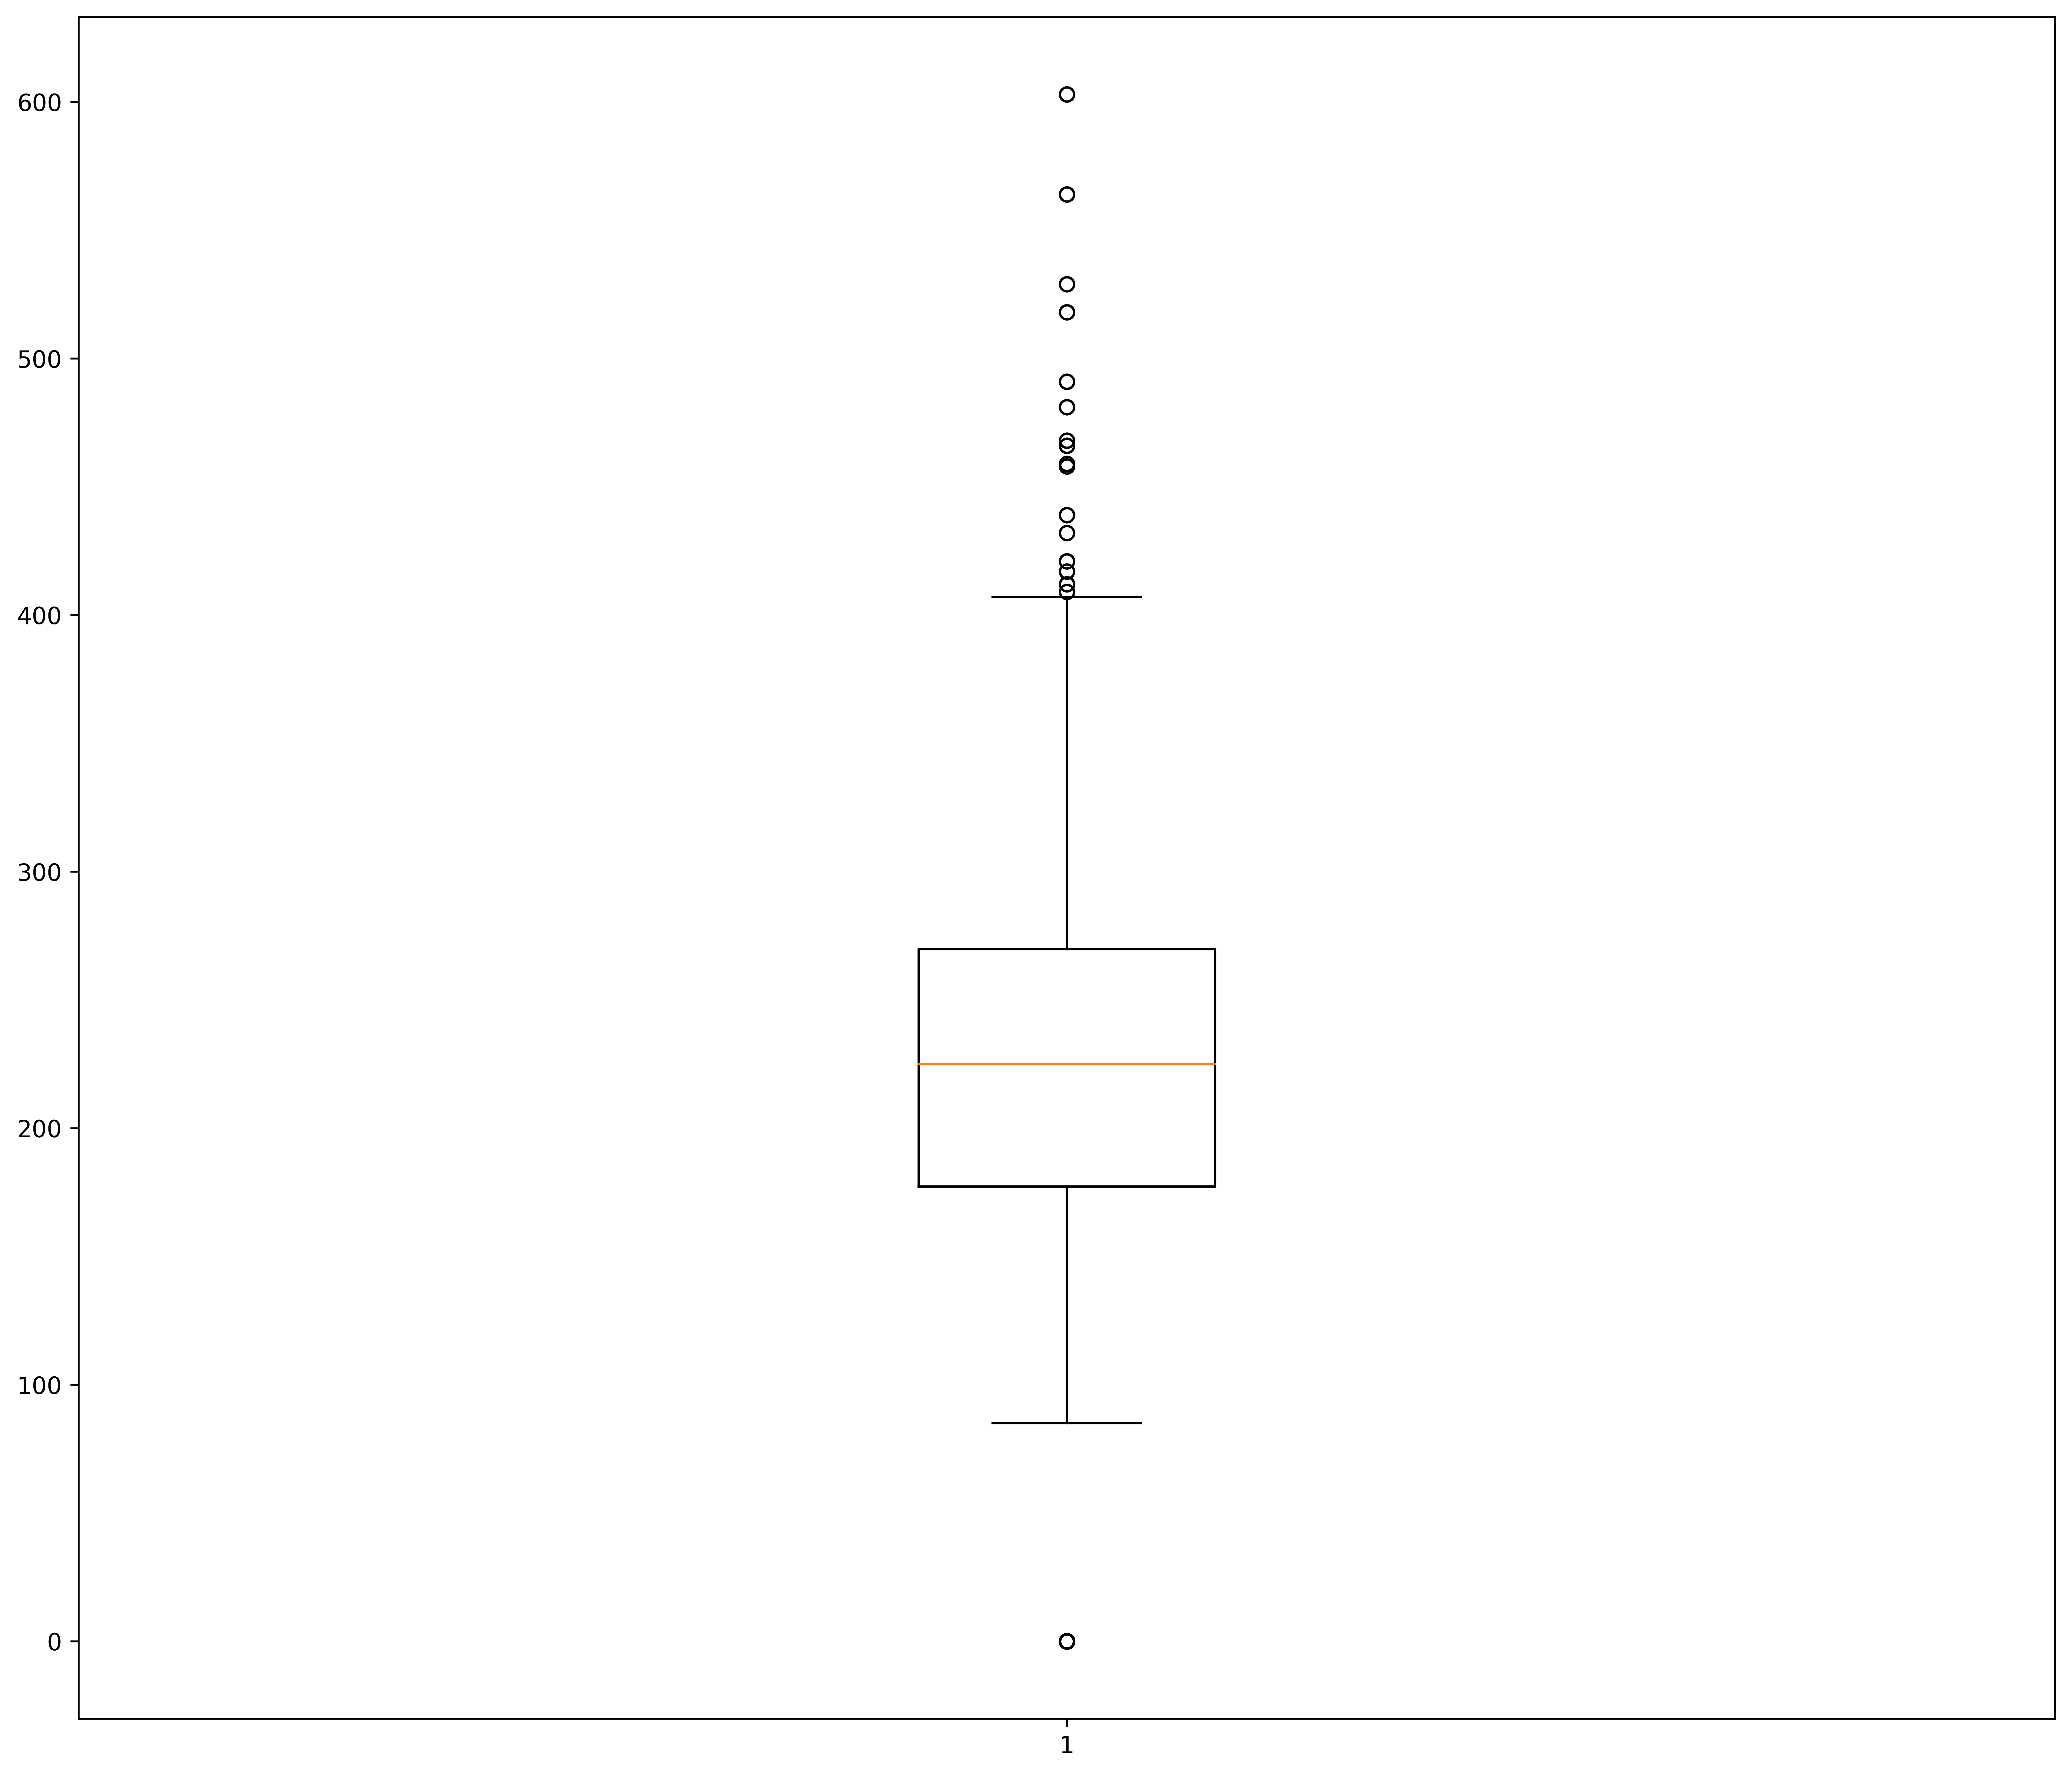

In [22]:
plt.boxplot(df['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2490bcb9290>,
 'caps': [<matplotlib.lines.Line2D at 0x2490bcba990>,
 'boxes': [<matplotlib.lines.Line2D at 0x2490bcb8650>],
 'medians': [<matplotlib.lines.Line2D at 0x2490bcc4110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2490bcc4b90>],
 'means': []}

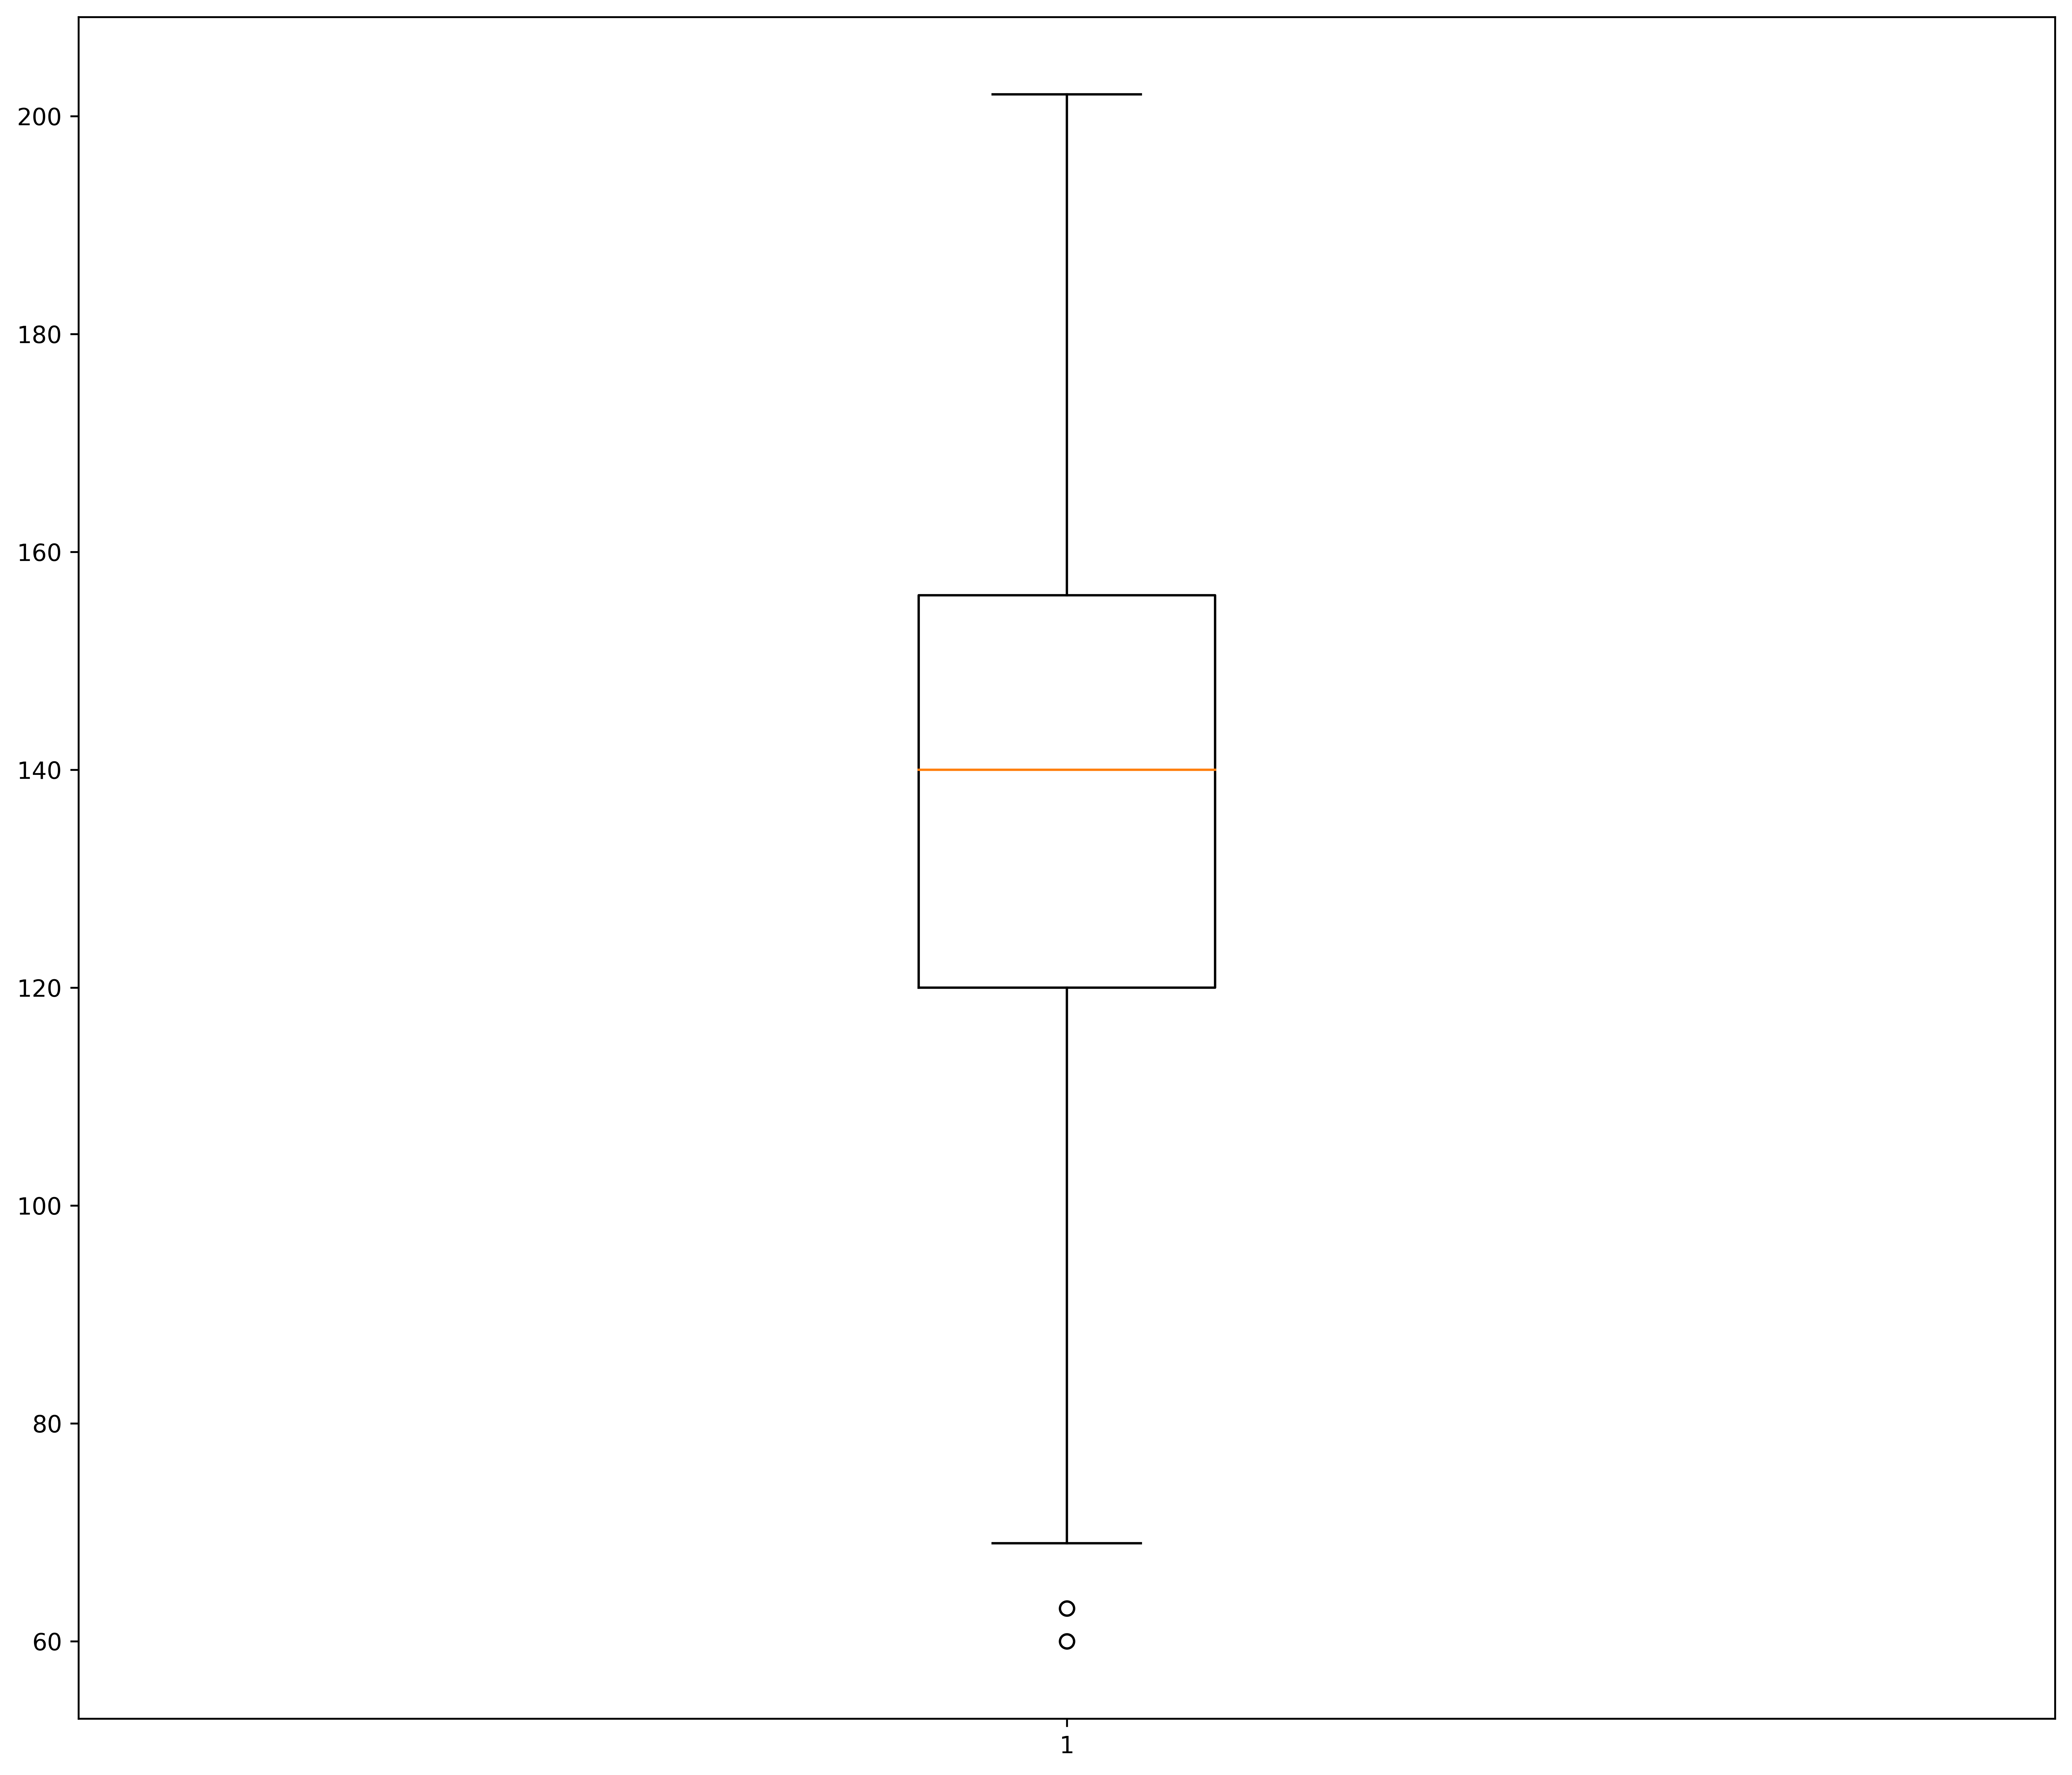

In [23]:
plt.boxplot(df['thalch'])

In [24]:
def outlier_detection(data,colname):
  q1=data[colname].quantile(0.25)
  q2=data[colname].quantile(0.75)
  iqr=q2-q1
  upper_extr=q2+(1.5*iqr)
  lower_extr=q1-(1.5*iqr)
  return upper_extr,lower_extr

In [25]:
outlier_detection(df,'trestbps')

(170.0, 90.0)

In [26]:
df.loc[df['trestbps']>170,'trestbps']=170

In [27]:
df.loc[df['trestbps']<90,'trestbps']=90

In [28]:
outlier_detection(df,'chol')

(408.5, 38.5)

In [29]:
df.loc[df['chol']>409,'chol']=409

In [30]:
df.loc[df['chol']<37,'chol']=37

In [31]:
outlier_detection(df,'thalch')

(210.0, 66.0)

In [32]:
df.loc[df['thalch']>210,'thalch']=210

In [33]:
df.loc[df['thalch']<66,'thalch']=66

<Axes: >

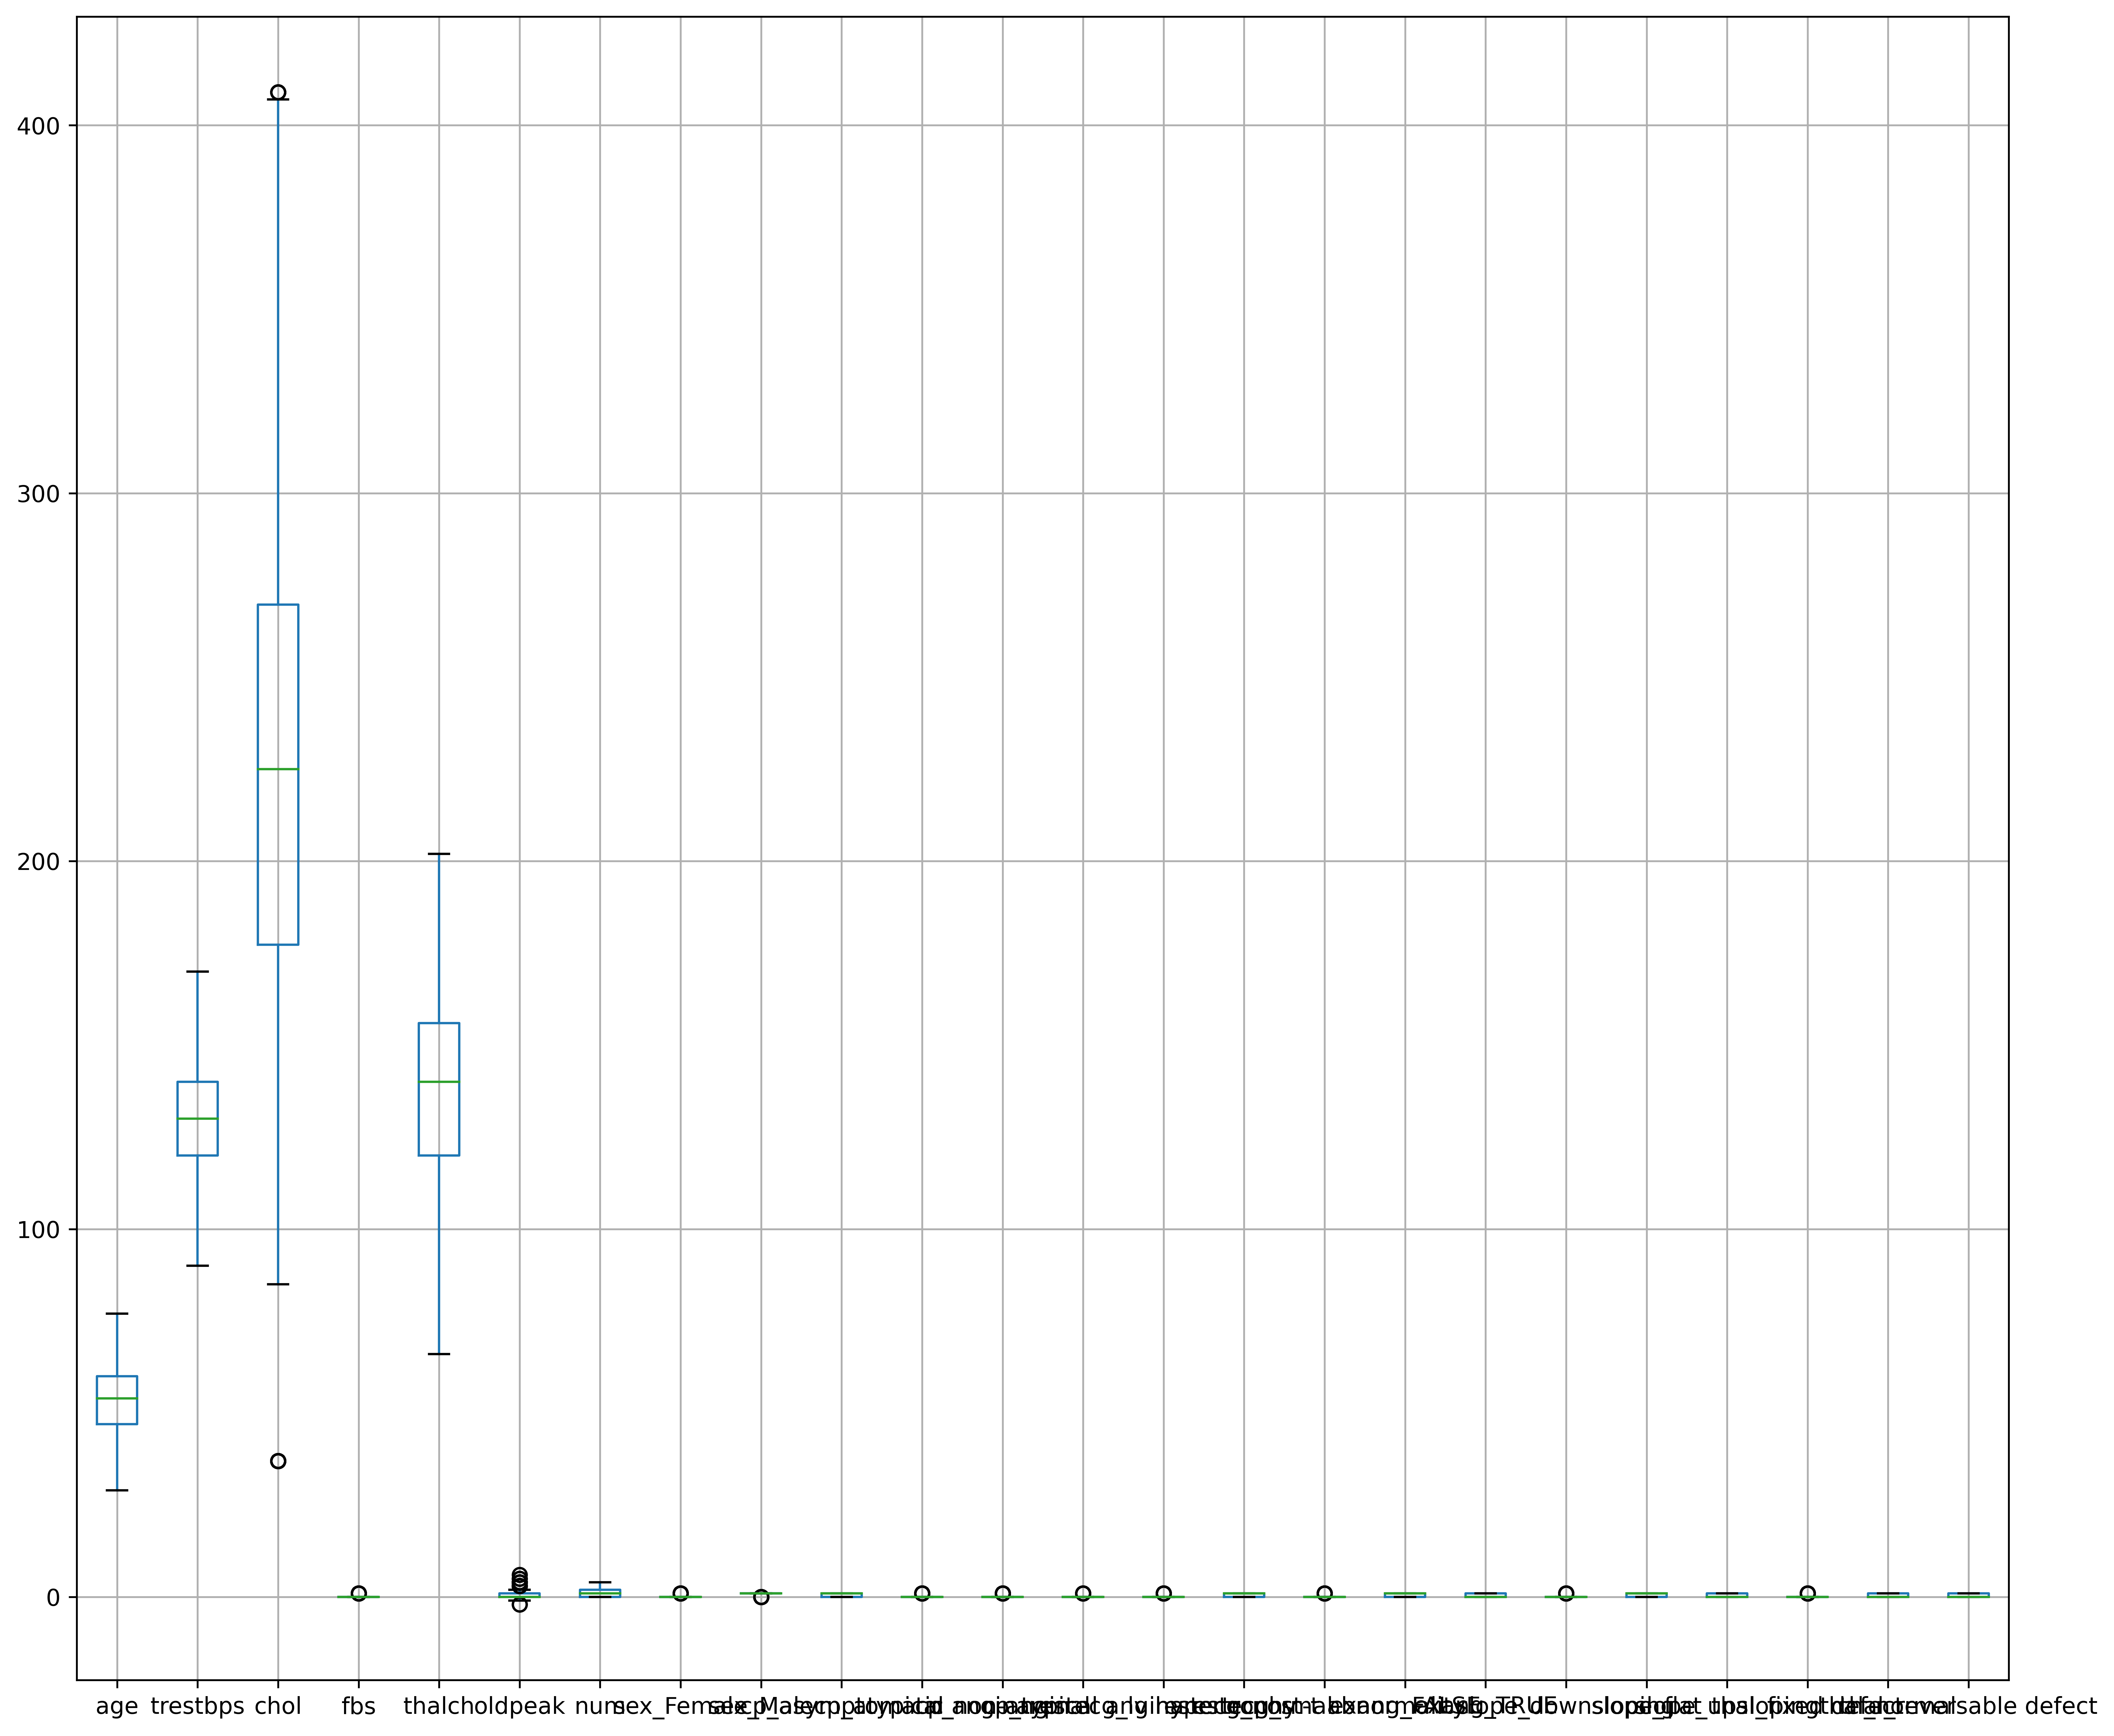

In [34]:
df.boxplot()

In [35]:
df


age  trestbps  chol  fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0     63       145   233    1     150        2    0           0         1   
1     41       135   203    0     132        0    0           0         1   
2     57       140   192    0     148        0    0           0         1   
3     52       118   186    0     190        0    0           0         1   
4     57       110   201    0     126        1    0           0         1   
..   ...       ...   ...  ...     ...      ...  ...         ...       ...   
901   51       110    37    1      92        0    4           0         1   
902   62       160   254    1     108        3    4           0         1   
903   53       125    37    0     120        1    4           0         1   
904   62       166   170    0     120        3    4           0         1   
905   56       170    37    0     123        2    4           0         1   

     cp_asymptomatic  ...  restecg_normal  restecg_st-t abnormality  \
0                  0  ...               0                         0   
1                  0  ...               1                         0   
2                  1  ...               1                         0   
3                  0  ...               0                         0   
4                  1  ...               1                         0   
..               ...  ...             ...                       ...   
901                1  ...               1                         0   
902                1  ...               0                         1   
903                1  ...               1                         0   
904                1  ...               0                         1   
905                0  ...               0                         0   

     exang_FALSE  exang_TRUE  slope_downsloping  slope_flat  slope_upsloping  \
0              1           0                  1           0                0   
1              1           0                  0           1                0   
2              1           0                  0           1                0   
3              1           0                  0           1                0   
4              0           1                  0           1                0   
..           ...         ...                ...         ...              ...   
901            1           0                  0           1                0   
902            0           1                  0           1                0   
903            1           0                  0           0                1   
904            0           1                  0           1                0   
905            0           1                  1           0                0   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                    1            0                       0  
1                    1            0                       0  
2                    1            0                       0  
3                    1            0                       0  
4                    1            0                       0  
..                 ...          ...                     ...  
901                  0            0                       1  
902                  0            0                       1  
903                  1            0                       0  
904                  1            0                       0  
905                  0            1                       0  

[846 rows x 24 columns]

In [36]:
x=df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [37]:
x

age  trestbps  chol  fbs  thalch  oldpeak  sex_Female  sex_Male  \
0     63       145   233    1     150        2           0         1   
1     41       135   203    0     132        0           0         1   
2     57       140   192    0     148        0           0         1   
3     52       118   186    0     190        0           0         1   
4     57       110   201    0     126        1           0         1   
..   ...       ...   ...  ...     ...      ...         ...       ...   
901   51       110    37    1      92        0           0         1   
902   62       160   254    1     108        3           0         1   
903   53       125    37    0     120        1           0         1   
904   62       166   170    0     120        3           0         1   
905   56       170    37    0     123        2           0         1   

     cp_asymptomatic  cp_atypical angina  ...  restecg_normal  \
0                  0                   0  ...               0   
1                  0                   1  ...               1   
2                  1                   0  ...               1   
3                  0                   0  ...               0   
4                  1                   0  ...               1   
..               ...                 ...  ...             ...   
901                1                   0  ...               1   
902                1                   0  ...               0   
903                1                   0  ...               1   
904                1                   0  ...               0   
905                0                   0  ...               0   

     restecg_st-t abnormality  exang_FALSE  exang_TRUE  slope_downsloping  \
0                           0            1           0                  1   
1                           0            1           0                  0   
2                           0            1           0                  0   
3                           0            1           0                  0   
4                           0            0           1                  0   
..                        ...          ...         ...                ...   
901                         0            1           0                  0   
902                         1            0           1                  0   
903                         0            1           0                  0   
904                         1            0           1                  0   
905                         0            0           1                  1   

     slope_flat  slope_upsloping  thal_fixed defect  thal_normal  \
0             0                0                  1            0   
1             1                0                  1            0   
2             1                0                  1            0   
3             1                0                  1            0   
4             1                0                  1            0   
..          ...              ...                ...          ...   
901           1                0                  0            0   
902           1                0                  0            0   
903           0                1                  1            0   
904           1                0                  1            0   
905           0                0                  0            1   

     thal_reversable defect  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
901                       1  
902                       1  
903                       0  
904                       0  
905                       0  

[846 rows x 23 columns]

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA()
fit=pca.fit_transform(x)

In [40]:
var=pca.explained_variance_ratio_
var

array([9.02036606e-01, 6.22864405e-02, 2.88385303e-02, 6.43954846e-03,
       1.09692118e-04, 4.30540996e-05, 3.45984191e-05, 3.38011201e-05,
       3.15840739e-05, 2.72187982e-05, 2.53674402e-05, 2.29492045e-05,
       1.86212053e-05, 1.74452591e-05, 1.53527494e-05, 1.36921960e-05,
       5.49770526e-06, 3.11484270e-36, 2.09149242e-36, 1.42331342e-36,
       1.16746000e-36, 6.19443736e-37, 3.80922578e-37])

In [41]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([90.2 , 96.43, 99.31, 99.95, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96])

In [42]:
# According to PCA first 5 columns are important contain high variance and high information.

In [43]:
y=df['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 846, dtype: int32

In [44]:
y.unique()

array([0, 1, 2, 3, 4])

In [45]:
x=x.iloc[:,:5]
x

age  trestbps  chol  fbs  thalch
0     63       145   233    1     150
1     41       135   203    0     132
2     57       140   192    0     148
3     52       118   186    0     190
4     57       110   201    0     126
..   ...       ...   ...  ...     ...
901   51       110    37    1      92
902   62       160   254    1     108
903   53       125    37    0     120
904   62       166   170    0     120
905   56       170    37    0     123

[846 rows x 5 columns]

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
x_train

age  trestbps  chol  fbs  thalch
136   51       125   213    0     125
224   54       120   221    0     138
409   39       110   280    0     150
135   74       120   269    0     121
642   62       120   254    0      93
..   ...       ...   ...  ...     ...
751   52       128   204    1     156
812   57       130   131    0     115
73    51       120   295    0     157
236   46       130   238    0      90
38    43       122   213    0     165

[676 rows x 5 columns]

In [48]:
y_train

136    0
224    0
409    1
135    0
642    1
      ..
751    2
812    3
73     0
236    0
38     0
Name: num, Length: 676, dtype: int32

In [49]:
x_test

age  trestbps  chol  fbs  thalch
729   52       122    37    0     110
377   52       140   100    0     138
186   61       140   298    1     120
486   40       152   223    0     181
745   62       135   297    0     130
..   ...       ...   ...  ...     ...
590   55       160   292    1     143
469   53       124   243    0     122
458   65       115    37    0      93
566   56       150   230    0     124
715   57       110   335    0     143

[170 rows x 5 columns]

In [50]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

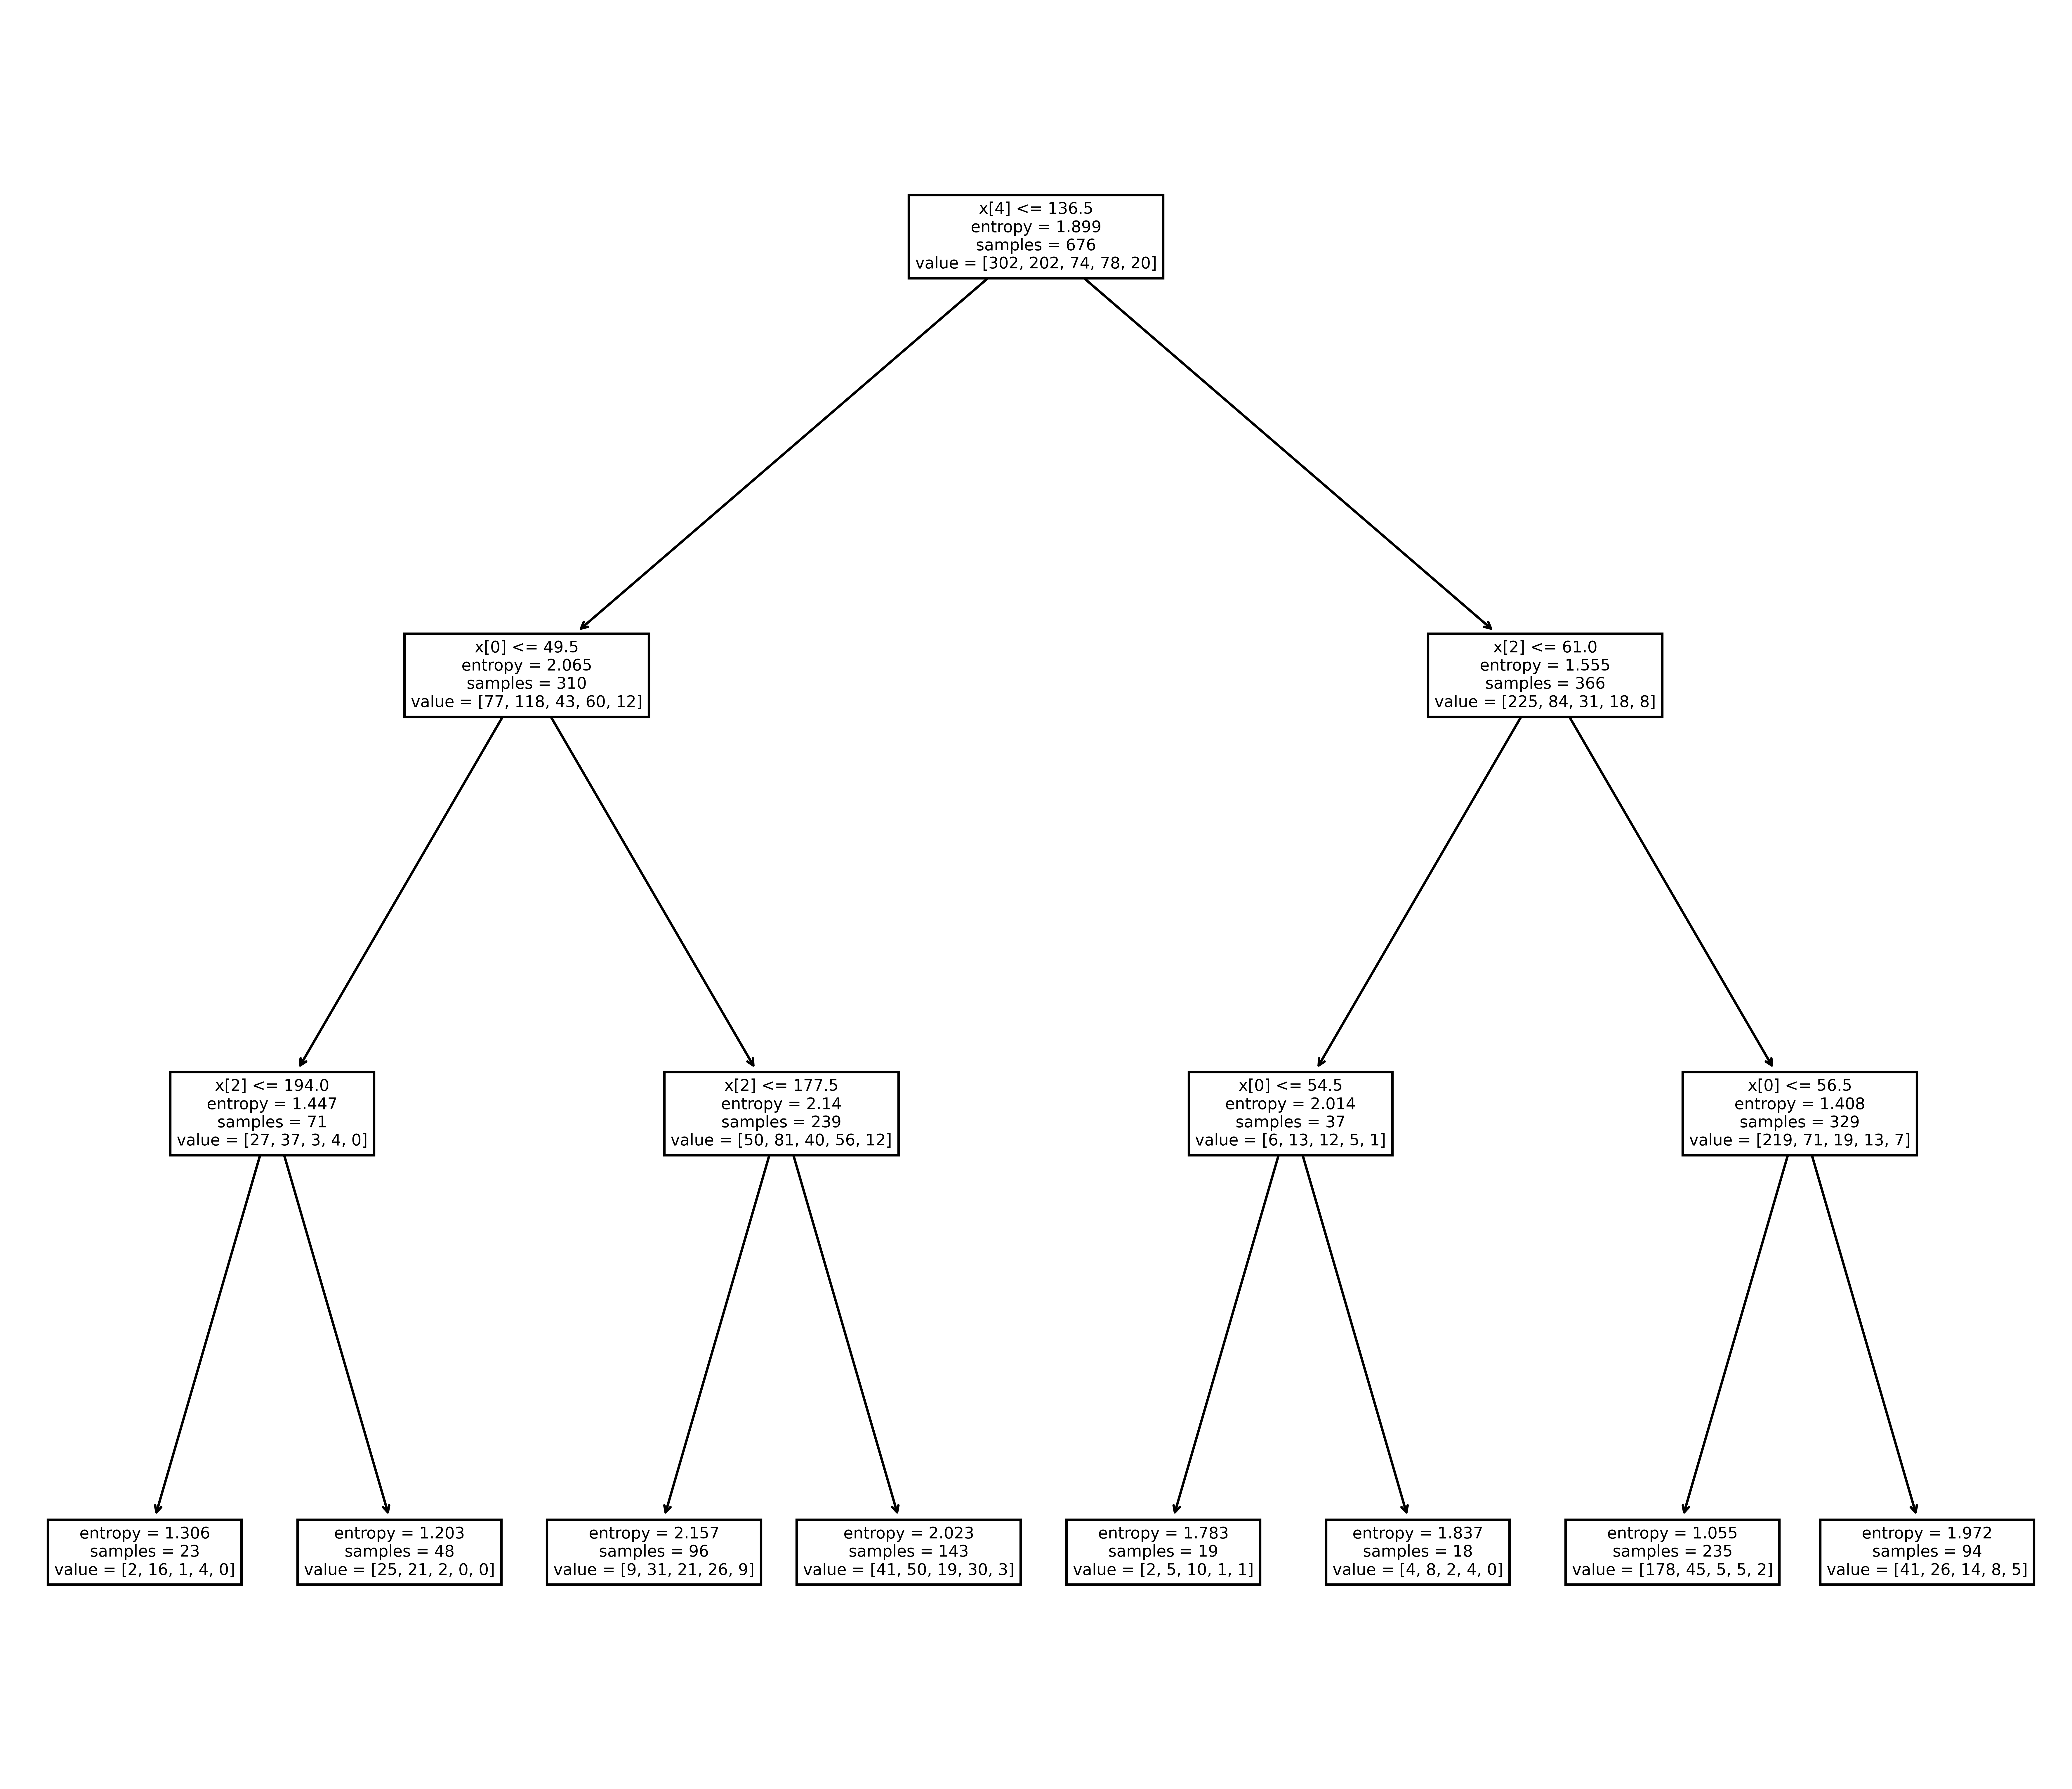

In [51]:
tree.plot_tree(model)
plt.show()

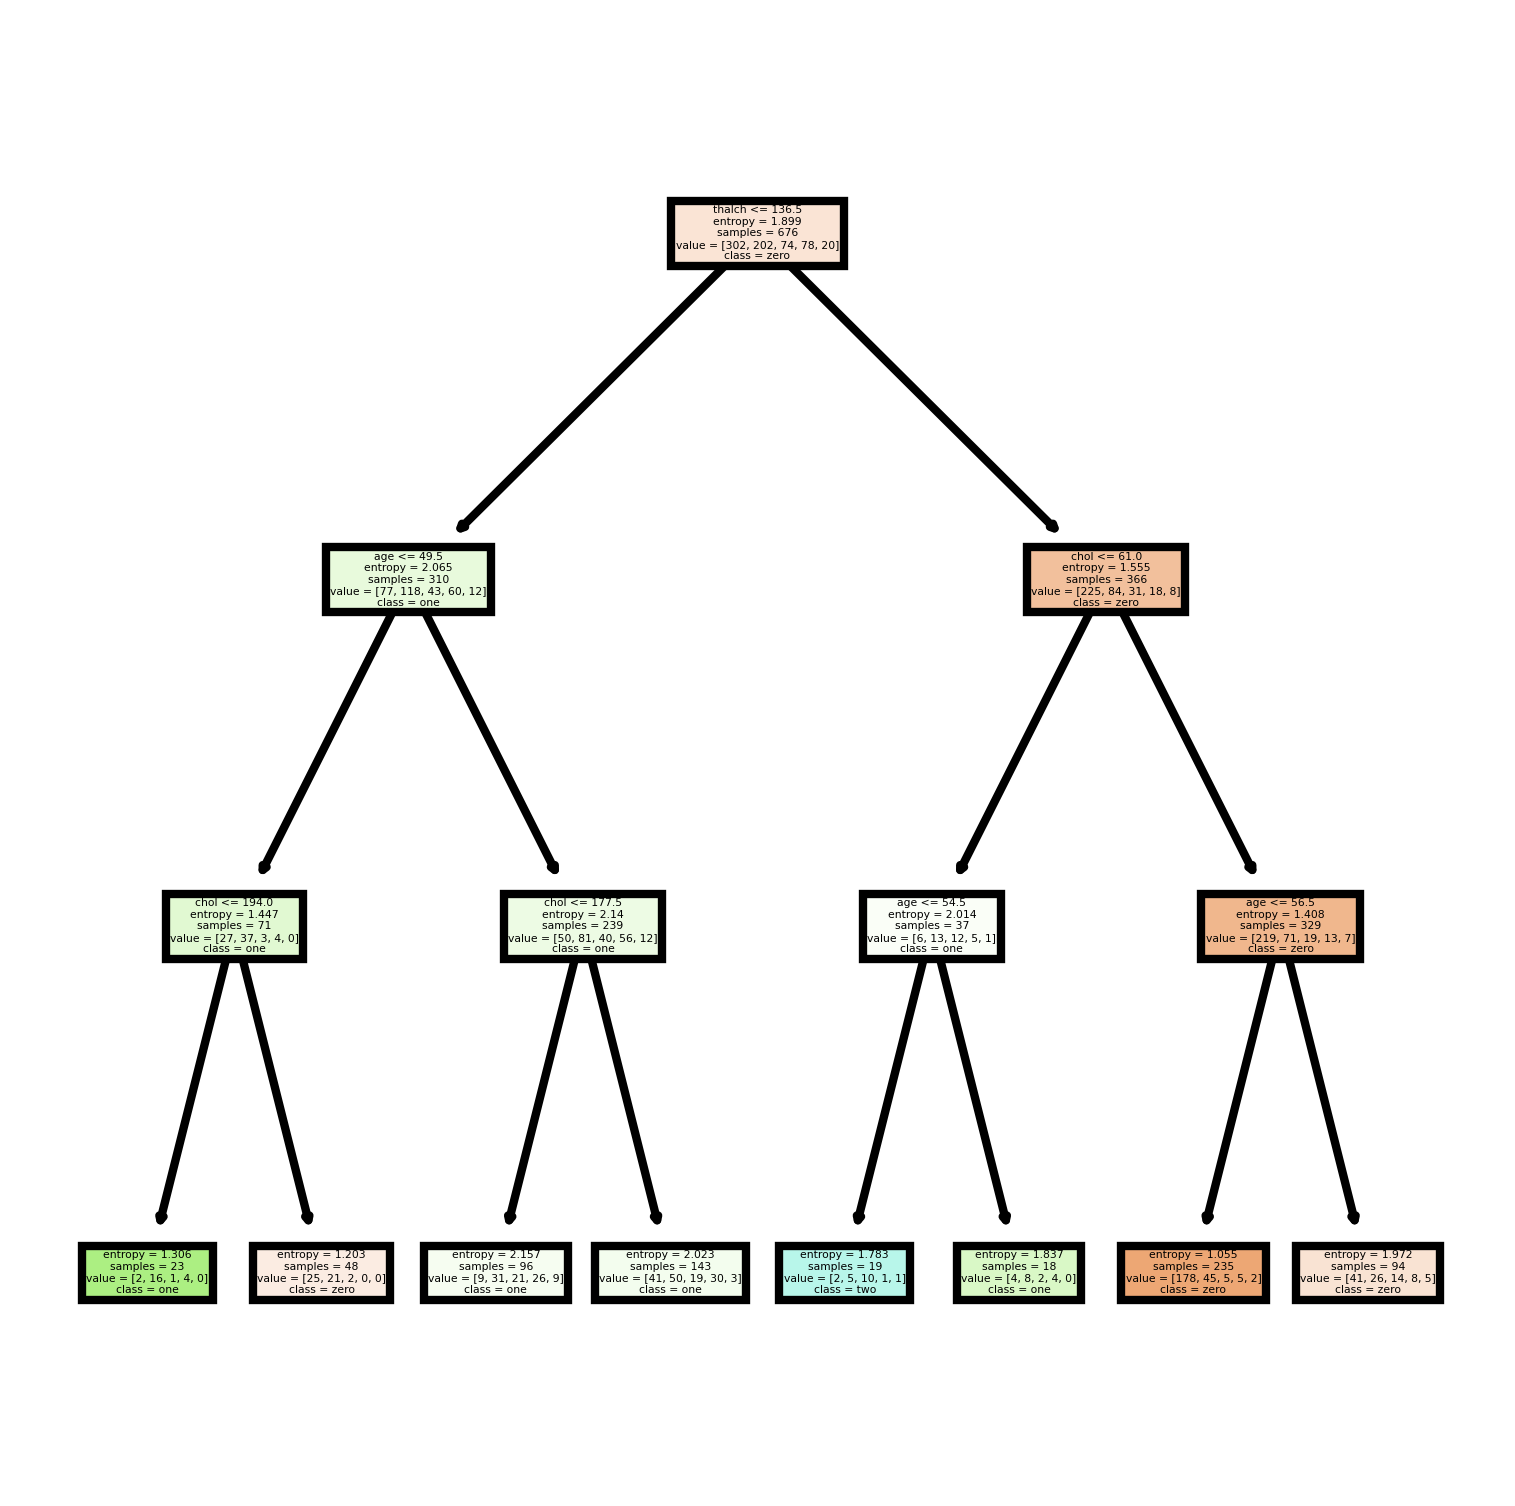

In [52]:
fn=['age',	'trestbps', 'chol',	'fbs',	'thalch','oldpeak',	'sex_Female',	'sex_Male',	'cp_asymptomatic',	'cp_atypical', 'angina','restecg_normal',	'restecg_st-t', 'abnormality'	,'exang_FALSE',	'exang_TRUE',	'slope_downsloping',	'slope_flat',	'slope_upsloping'	,'thal_fixed defect'	,'thal_normal',	'thal_reversable defect']
cn=['zero','one','two','three','four']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=600)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [53]:
y_preds=model.predict(x_test)

In [54]:
model.feature_importances_

array([0.31837789, 0.        , 0.30730033, 0.        , 0.37432178])

In [55]:
pd.crosstab(y_test,y_preds)

col_0   0   1  2
num             
0      52  23  1
1      23  24  1
2      10  16  1
3       5   8  0
4       1   5  0

In [56]:
x_test.shape

(170, 5)

In [57]:
np.mean(y_preds==y_test)

0.45294117647058824

In [58]:
model.score(x_test,y_test)


0.45294117647058824

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid={
    'max_depth':[3,4,5,6,8,9,10],
    'criterion':['gini','entropy']


}

In [61]:
dt=DecisionTreeClassifier(random_state=1)
grid=GridSearchCV(estimator=dt,param_grid=param_grid)

In [62]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [63]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [64]:
y_pred=dt.predict(x_test)

In [65]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [66]:
pd.crosstab(y_test,y_pred)

col_0   0   1  2
num             
0      52  23  1
1      23  24  1
2      10  16  1
3       5   8  0
4       1   5  0

In [68]:
dt.score(x_test,y_test)

0.45294117647058824